In [2]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#dataset loading
df=pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
#null value checking
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
#replacing null values with mean value

df['DC'].fillna(df['DC'].mean(),inplace=True)

print(df['DC'])

0       94.3
1      669.1
2      686.9
3       77.5
4      102.2
       ...  
512    665.6
513    665.6
514    665.6
515    614.7
516    106.7
Name: DC, Length: 517, dtype: float64


In [25]:
#how data is skewed
#If the skewness is 0, then the distribution is perfectly symmetrical.
#If the skewness is negative, then the distribution has a longer tail on the left side, and
#if it is positive, then the distribution has a longer tail on the right side.

data=df.drop(['month','day'],axis=1)
skew=data.skew()
if(skew.all()==0):
    print("Data distribution is symmetrical")
elif(skew.all()<0):
    print("Data distribution has longer tail on the left side")
else:
    print("Data distribution has longer tail on the right side")

#kurtosis
kurt=data.kurtosis()

print("Kurtosis-->\n",kurt)

Data distribution has longer tail on the right side
Kurtosis-->
 X        -1.172331
Y         1.420553
FFMC     67.066041
DMC       0.204822
DC       -0.245244
ISI      21.458037
temp      0.136166
RH        0.438183
wind      0.054324
rain    421.295964
area    194.140721
dtype: float64


In [43]:
#outliers detecction
threshold=df['DMC'].mean()
def get_outliers(data):
    mean=np.mean(data)
    std=np.std(data)
    z_score=np.abs((data-mean)/std);
    return np.where(z_score>threshold)

outliers=get_outliers(df['DMC'])

print(outliers)

(array([], dtype=int64),)


Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area'],
      dtype='object')


/tmp/ipykernel_4624/2794398547.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k)


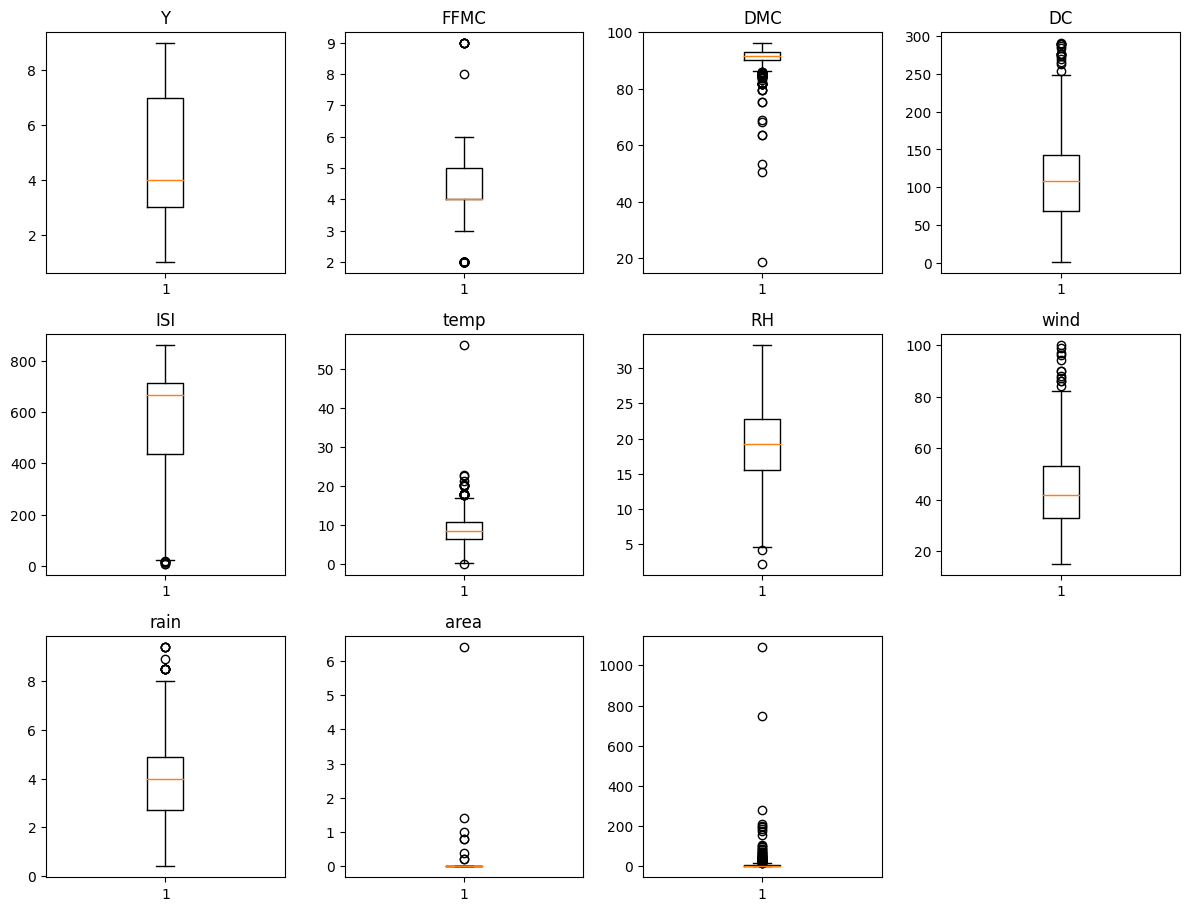

In [52]:
#plotting the outliers with boxplot
cols=df.drop(['month','day'],axis=1).columns
print(cols)

k=1
plt.figure(figsize=(12,12))
for i in cols:
    plt.title(i)
    plt.subplot(4,4,k)
    plt.boxplot(df[i])
    k+=1
plt.tight_layout()
plt.show()

In [53]:
print(df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [68]:
#preparing the data
#normalizing the datas

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
scalar=MinMaxScaler()
le=LabelEncoder()

df['DC']=scalar.fit_transform(np.array(df['DC']).reshape(-1,1))
df['FFMC']=scalar.fit_transform(np.array(df['FFMC']).reshape(-1,1))
df['day']=le.fit_transform(np.array(df['day']))
df['month']=le.fit_transform(np.array(df['month']))

print(df.head())

   X  Y  month  day      FFMC   DMC        DC  ISI  temp  RH  wind  rain  area
0  7  5      7    0  0.870968  26.2  0.101325  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    5  0.927742  35.4  0.775419  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    2  0.927742  43.7  0.796294  6.7  14.6  33   1.3   0.0   0.0
3  8  6      7    0  0.941935  33.3  0.081623  9.0   8.3  97   4.0   0.2   0.0
4  8  6      7    3  0.910968  51.3  0.110590  9.6  11.4  99   1.8   0.0   0.0


[ 7 10  1 11  0  6  5  3  4  2  8  9]
month
0      42.0
1     751.9
2      68.8
3      75.1
4       4.0
5     119.5
6      70.3
7     268.3
8       8.9
9       4.5
10     51.9
11    611.9
Name: wind, dtype: float64


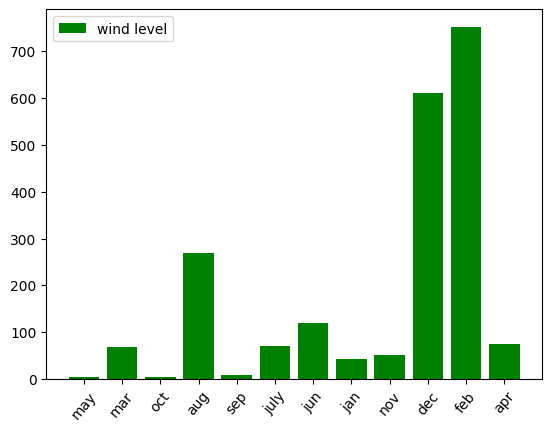

In [75]:
#data visualization
#wind in each month
x=np.array(df['month'].unique())
print(x)

y=df.groupby('month')['wind'].sum()
print(y)

labels=['jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov','dec']
plt.xticks(x,labels,rotation=50)
plt.bar(x,y,color='green',label='wind level')
plt.legend()
plt.show()

In [89]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

model=LinearRegression()

features=df.drop(['temp'],axis=1)
result=df['temp']

x_train,x_test,y_train,y_test=train_test_split(features,result,test_size=0.1)

In [90]:
model.fit(x_train,y_train)

pred=model.predict(x_test)

mse=mean_squared_error(pred,y_test)
r2Score=r2_score(pred,y_test)

print(mse)
print(r2Score)

11.162959762043904
0.3506317405211935


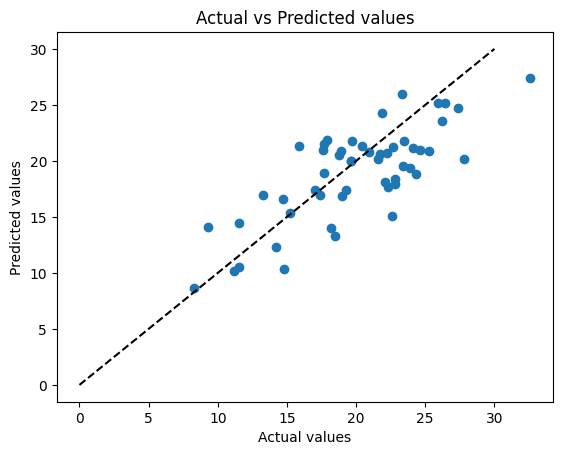

In [95]:
#visulalization of the model performance
plt.scatter(y_test,pred)
plt.plot([0, 30], [0, 30], '--k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()